# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [1]:
# Let's begin by importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.estimators import plot_feature_importances
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data

df = pd.read_csv('./data/prepared_churn_data_GM.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   float64
 1   PhoneService       7043 non-null   int64  
 2   Contract           7043 non-null   int64  
 3   PaymentMethod      7043 non-null   int64  
 4   MonthlyCharges     7043 non-null   float64
 5   TotalCharges       7043 non-null   float64
 6   Churn              7043 non-null   int64  
 7   charge_per_tenure  7043 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 495.2+ KB


In [3]:
# If present, drop Customer ID, it's not a feature. This will let me easily test different prepared datasets

if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
df.describe()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.416442,0.903166,0.690473,1.684367,64.761692,2281.916928,0.265370,64.773480
std,24.526454,0.295752,0.833755,1.148907,30.090047,2265.270398,0.441561,30.169438
min,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,13.775000
25%,9.000000,1.000000,0.000000,1.000000,35.500000,402.225000,0.000000,36.255000
50%,29.000000,1.000000,0.000000,2.000000,70.350000,1397.475000,0.000000,70.300000
75%,55.000000,1.000000,1.000000,3.000000,89.850000,3786.600000,1.000000,90.174158
max,72.000000,1.000000,2.000000,3.000000,118.750000,8684.800000,1.000000,121.400000


In [4]:
# Split the data into features and targets
X = df.drop('Churn', axis=1)
y = df['Churn']

In [5]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Use sklearn to fit a decision tree to the training data

dt = DecisionTreeClassifier( max_depth=4, random_state=42)   
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))


0.7917997870074548
0.7877927608232789


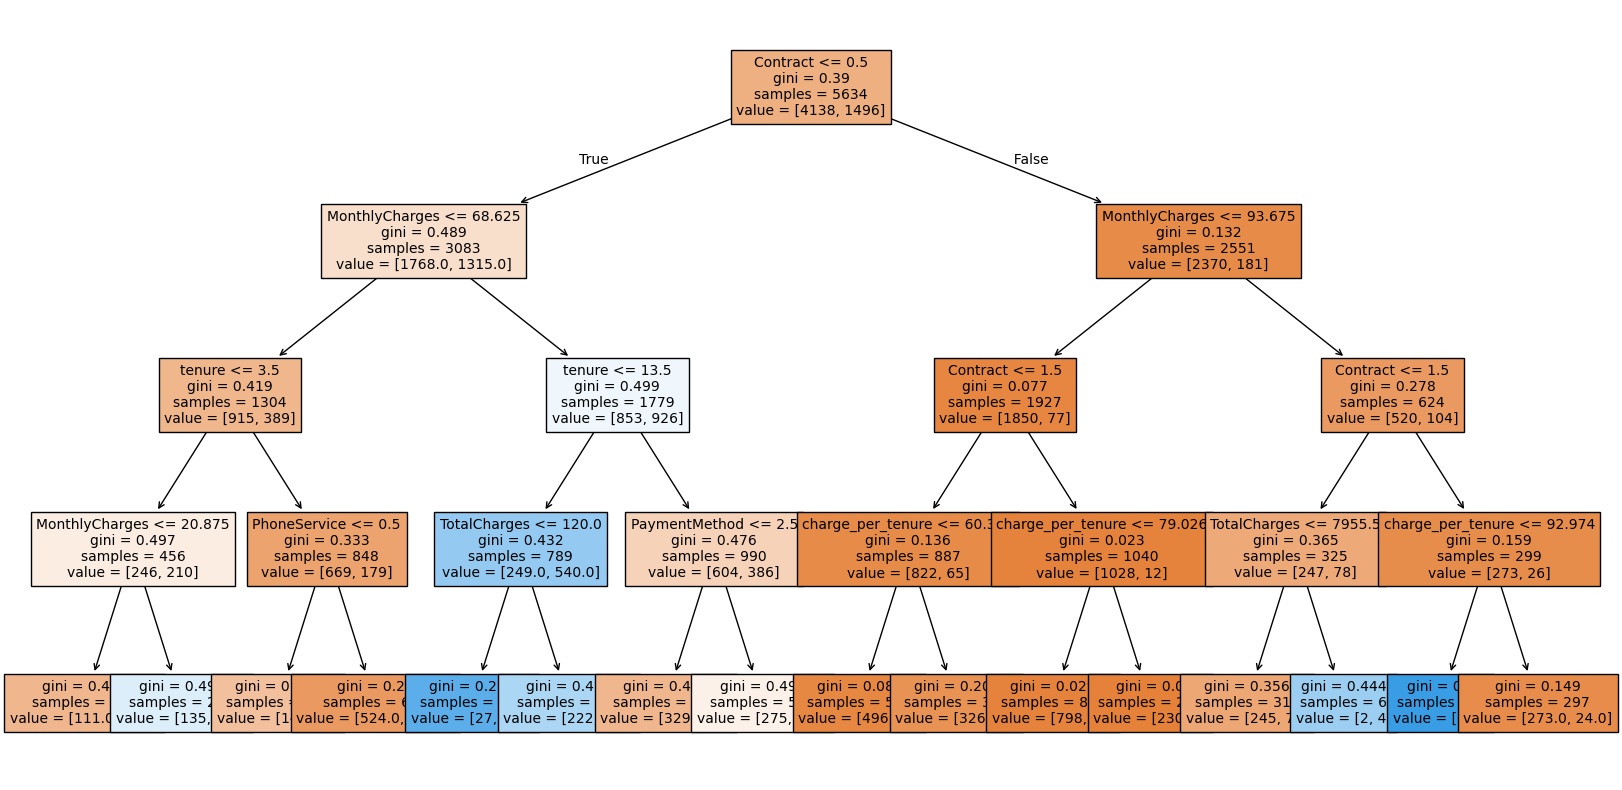

In [7]:
# Plot the decision tree

f = plt.figure(figsize=(20,10))
plotted = plot_tree(dt, feature_names=X.columns,filled=True, fontsize=10)

In [8]:
# Try to improve the model with max_depth or hyperparameter tuning

dt = DecisionTreeClassifier( max_depth=6, max_features=4,random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.7992545260915868
0.7963094393186657


In [9]:
# Try using Grid Search to find the best parameters

param_grid = {
    'ccp_alpha': [0.0, 0.01, 0.1],
    'max_features': [2, 4, 6],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 10, 'max_features': 6}


In [10]:
# Use the parameters from the grid search

dt = DecisionTreeClassifier(ccp_alpha=0.01,max_depth=10,max_features=6,random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.786119985800497
0.7892122072391767


<Axes: >

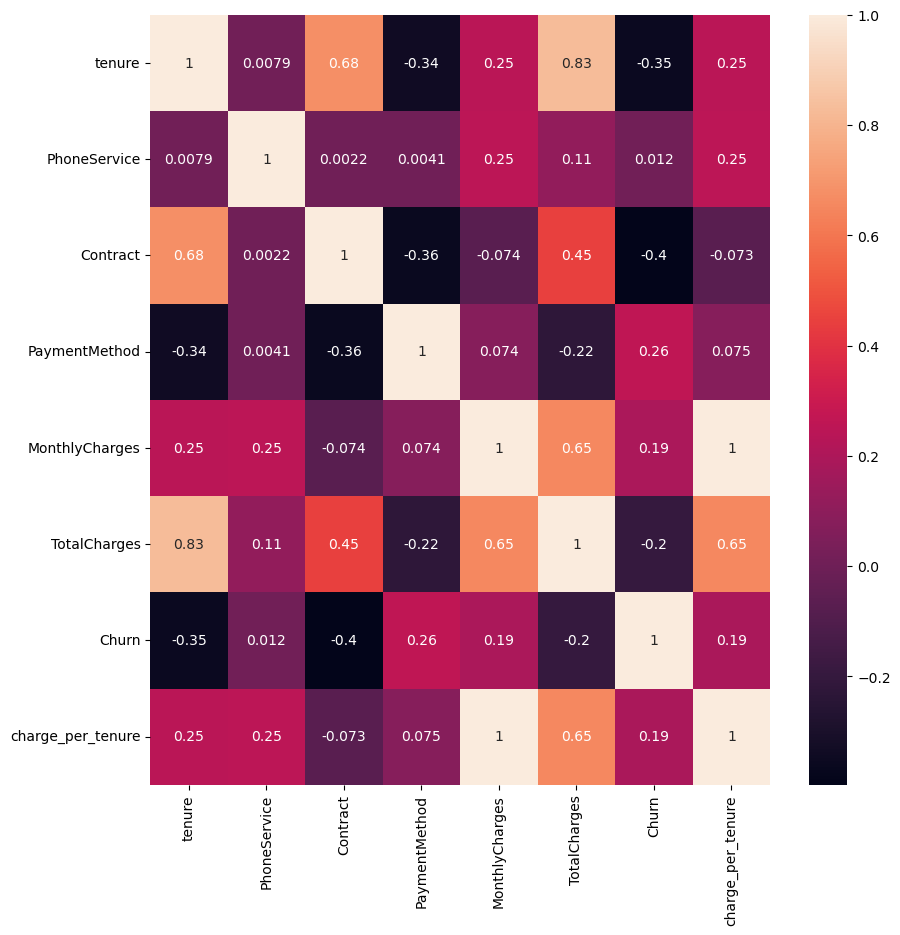

In [11]:
# Plot the correlations between features and targets

f = plt.figure(figsize=(10, 10))
pallet = sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=pallet)

In [12]:
# Fit the data to a random forest model to predict churn from our dataset

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))


0.8020944266950657
0.801277501774308


<Axes: title={'center': 'Feature Importance'}>

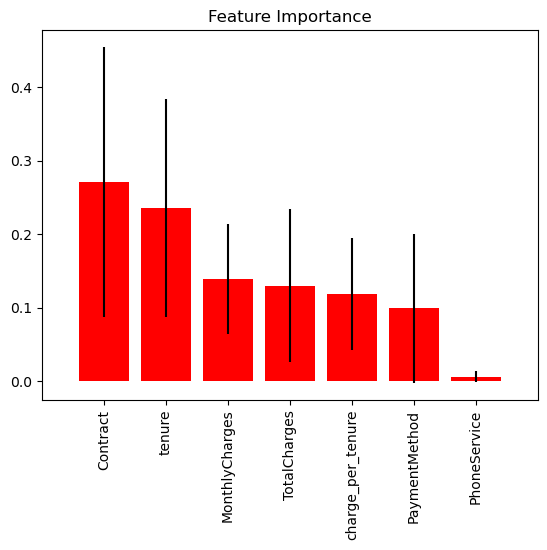

In [13]:
# Plot feature importance from the random forest

plot_feature_importances(rfc, feature_names=X.columns, x_tick_rotation=90)

In [14]:
# Remove the less important features

new_X = X.drop(['PhoneService', 'TotalCharges', 'charge_per_tenure'], axis=1)
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   float64
 1   Contract        7043 non-null   int64  
 2   PaymentMethod   7043 non-null   int64  
 3   MonthlyCharges  7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 533.2+ KB


In [15]:

# Re-split the data, fit the random forest model to the new data

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8029818956336529
0.8069552874378992


<Axes: title={'center': 'Feature Importance'}>

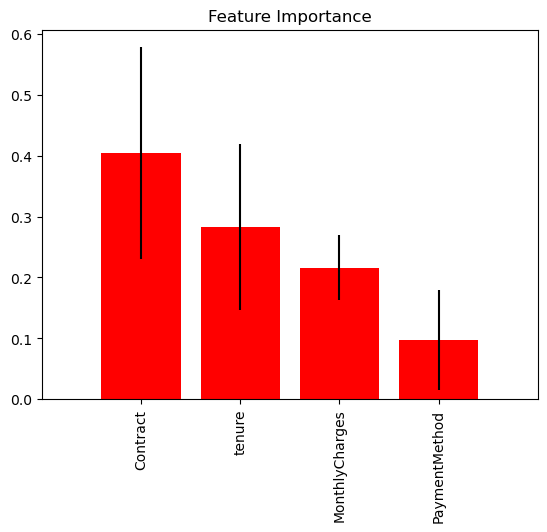

In [16]:
# Plot feature importance from the random forest

plot_feature_importances(rfc, feature_names=new_X.columns, x_tick_rotation=90)

# Summary

### Step 1 : Importing libraries
We began with importing library modules.  I'll briefly describe each one and their purpose:

- **pandas** for working with files and datasets
- **matplotlib.pyplot** for plotting, specifically our DecisionTree
- **seaborn** for visualizing correlation between features with a heatmap
- **scikitplot.estimators** provides plotting capabilites for sklearn estimators (i.e. RandomForestClassifier)
- **sklearn.model_selection** provides tools for working with learning models (e.g. Splitters, Hyper-parameter optimizers)
- **sklearn.tree** provides tools for working with and visualizing decision tree models for classification and regression
- **sklearn.ensemble** provides ensemble-based methods for classification and regression.  From [https://scikit-learn.org/stable/modules/ensemble.html#ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble): _Ensemble-based methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator_

### Step 2:  Loading the data
I chose to work with the prepared dataset provided by the instructor rather than my own.  I wanted to see if there were differences and assumptions that I had been making in my own effort that might be confounding my analysis.  See the accompanying file named 'prepared_churn_data_GM.csv'.  Inspecting the output from info(), I confirmed that the data was ready for our learning models.

I included a conditional test to see if the CustomerID field was present.  If so, I drop that column because it's not a feature we can use in our models. This allowed me to quickly switch between my prepared data and the data provided by the instructor.

### Step 3: Splitting data into features and targes
Our target once again is 'Churn'.  I chose to use the X, y naming convention (for features and targets, respectively) since that seems to be a common practice.  I want to get used to seeing that.

### Step 4: Preparing the training and test datasets
In my call to train_test_split(), I chose to use the test_size paramater rather that stratifying data using labels from the targets.  I simply experimented with both and found the 80/20 split to be the best fit.

### Step 5: Fitting the data to a DecisionTree
I experimented with various parameters to the DecisionTreeClassifier:
- **max_depth**: through trial and error, a max_depth of 4 gave me the best fit.
- **criterion**: I tried 'entropy' and 'log_loss', but 'gini' (the default) outperformed both
- **class_weight**:  I tried 'balanced' as a value for class weight, but the model performed poorly.

### Step 6: Plotting the decision tree
The decision tree shows how Contract and tenure are informing predictions that result in Churn == 1.  Looking at the tree, I am led to suspect that TotalCharges, being dependent on tenure, is not adding much value to the model.  I can also see that the sample sizes are still large enough to maybe allow for another level or two.

### Step 7:  Tuning the model
I tried a max_depth of 6 and experimented with max_features.  Trial and error improved the model slighty, and addressed overfitting.  Just to gain the experience, I tried using GridSearch.  Using the parameters recommend by the grid search seemed to have a small effect on overfitting, but the accuracy of the model overall was slightly degraded.

### Step 8: Plotting correlations between features and targets
The correlation heatmap shows what I already have suspected... Contract and tenure are the features most strongly correlated to churn.  It also reveals the dependency between TotalCharges and tenure, and between charge_per_tenure and MonthlyCharges.  This led me to drop these features in a later step.

### Step 9:  RandomForestClassifier
In this step, I fit the data to a RandomForestClassifier, and the results outperformed the decision tree.  The fit was nearly optimal, with a mean accuracy of 80.1%

### Step 10: Plot feature importance
Plotting the feature importance from the RandomForestClassifier reinforces my understanding of the role that Contract and tenure play in this predictive model.  It also presents a possible opportunity for improving the model by addressing the skew in the data.  With Contract type, we might benefit from a binary classification "hasContract" {0: no, 1: yes} or by applying a transformation to tenure.

### Step 11:  Drop less-important features
I dropped "PhoneService" as a result of the previous step, and I dropped "TotalCharges" and "charge_per_tenure" because it seemed to me that they were noise, or worse, they might have been making MonthlyCharges more important that normal.

### Step 12:  Re-fit the RandomForestClassifier
With the leaner dataset, I re-fit the RandomForestClassifier and it performed slightly better. It may have been a bit underfit, but not significantly.  The accuracy of the new trial was 80.7%.

### Step 13: Re-plot feature importance
As expected, the relative importance of each feature went up, because there are fewer features to compete for significance.


One final note... I've been exploring notebooks that people have uploaded to Kaggle. I'm benefiting from the examples.




















    

    
    


